In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
from scipy.optimize import fsolve
from numpy import sin, cos, pi, array

In [2]:
# print(plt.style.available)
plt.style.use('fivethirtyeight')

***1st method***\begin{equation*} y'' + 9y = cos(t),~y(π) = −5/3,~y'(0) = 5  \tag{1}\end{equation*}

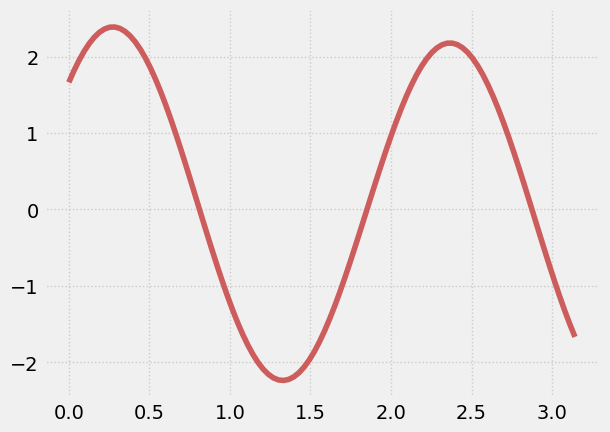

In [3]:
def ode(t, Y):
    
    y, yp = Y
    ypp = -9*y + np.cos(t)
    
    return np.array([yp, ypp])

def objective(u):
    
    r = np.zeros(len(u))
    # the initial value of y(0) is not known - u[0]
    sol = solve_ivp(ode, [t[0], t[-1]], np.array([u[0], 5], dtype=object), t_eval = t)
    y, yp = sol.y
    r[0] = y[-1] + 5/3 # as y(π) + 5/3 = 0 
    
    return r

t = np.linspace(0, np.pi, 100)

# the starting estimate for the roots o
u = 0.5
# fsolve returns the roots of f(x) = 0
u = fsolve(objective, u)

sol = solve_ivp(ode, [t[0], t[-1]], np.array([u[0], 5], dtype=object), t_eval = t)
y, yp = sol.y

plt.plot(sol.t, y, color = 'indianred')
plt.grid(linestyle='dotted')

***2nd method***\begin{equation*} y'' + 9y = cos(t),~y(π) = −5/3,~y'(0) = 5  \tag{2}\end{equation*}

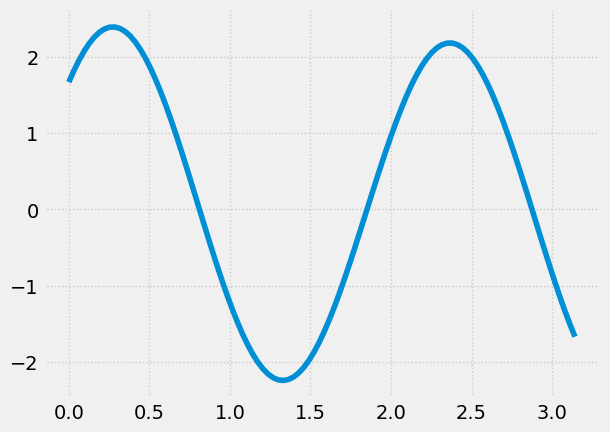

In [4]:
def ode(x, Y):
    
    y, yp = Y
    ypp = -9*y + np.cos(x)
    
    return np.array([yp, ypp])

def bc(ya, yb):
    
    left_y, left_yp = ya
    right_y, right_yp = yb
    
    return np.array([left_yp - 5, right_y + 5/3, ])

x = np.linspace(0, np.pi, 100)
y = np.zeros((2, x.size))

sol = solve_bvp(ode, bc, x, y)

y, yp = sol.y

plt.plot(sol.x, y)
plt.grid(linestyle='dotted')

\begin{equation*} y''''(x) = x, y(0) = 0,~y(1) = 0,~y''(0) = 0,~y''(1) = 0  \tag{3}\end{equation*}

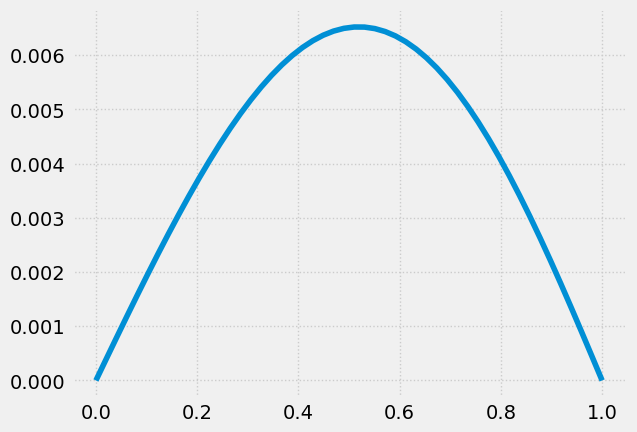

In [5]:
def fun(x, Y):
    
    y, yp, ypp, yppp = Y
    ypppp = x
    
    return [yp, ypp, yppp, ypppp]

# ya: lower boundary which is 0 and yb: maximum boundary which is 1 for this example
def bc(ya, yb):
    
    # unpack y, yp, ypp, yppp for left and right side
    left_y, left_yp, left_ypp, left_yppp = ya
    right_y, right_yp, right_ypp, right_yppp = yb
    
    return np.array([left_y - 0, left_ypp - 0, right_y - 0, right_ypp - 0])

x = np.linspace(0, 1, 50)
y = np.zeros((4, x.size)) # because wigh have 4 arrays from to return from bc function

sol = solve_bvp(fun, bc, x, y)

y, yp, ypp, yppp = sol.y

plt.plot(sol.x, y)
plt.grid(linestyle='dotted')

\begin{equation*} y'' + k^2y = 0,~y(0) = y(1) = 0  \tag{3}\end{equation*}

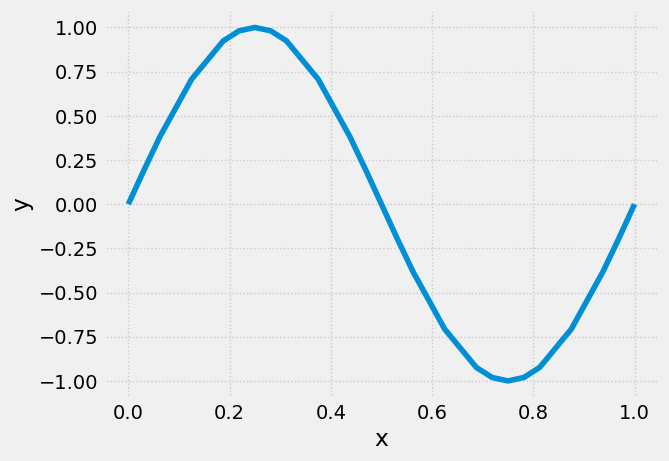

In [6]:
def fun(x, Y, k):
    
    y, yp = Y
    ypp = -y*k**2
    
    return [yp, ypp]

# ya stands for y(0) and yb stands for y(1)
def bc(ya, yb, p):
    
    left_y, left_yp = ya
    right_y, right_yp = yb
    # boundary condition residual
    k = p[0]

    return np.array([left_y - 0, left_yp - k, right_y - 0]) # y'(0) = k

x = np.linspace(0, 1, 5)
y = np.zeros((2, x.size))
y[0, 1] = 1
y[0, 3] = -1

# solve bvp
sol = solve_bvp(fun, bc, x, y, p=[6])

y, yp = sol.y

plt.plot(sol.x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle='dotted')

***In numerical analysis, the shooting method is a method for solving a boundary value problem by reducing it to an initial value problem.***

\begin{equation*} \frac{d^2 x}{d t^2} = (4+x)\frac{d y}{d t} - 5x + 9.81cos(y) \tag{4a}\end{equation*}
\begin{equation*} \frac{d^2 y}{d t^2} = \frac {-9.81sin(y) - 2\frac{d x}{d t}\frac{d y}{d t}}{0.4 + x}\tag{4b}\end{equation*}

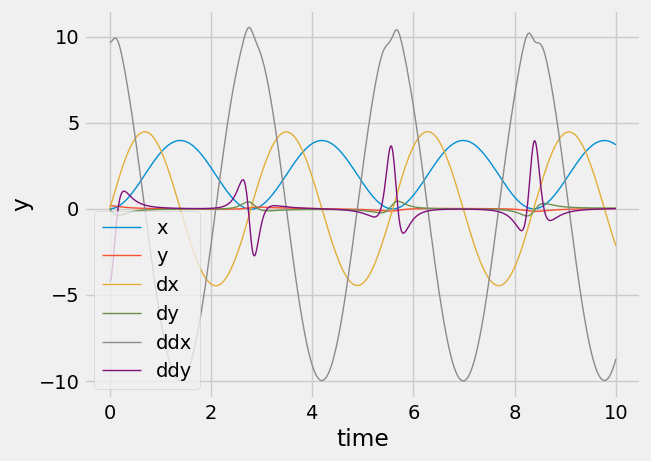

In [7]:
def deriv(t, Y):
    
    x, y, dx, dy = Y
    
    ddx = (4 + x)*(dy)**2 - 5*x + 9.81*np.cos(y)
    
    ddy = (-9.81*np.sin(y)-2*(dx)*(dy))/(0.4 + x)
    
    return [dx, dy, ddx, ddy]


init = array([0.0, pi/18, 0.0, 0.0]) 

t = np.linspace(0.0, 10.0, 1000)

sol = solve_ivp(deriv, [t[0], t[-1]], init, t_eval = t)

x, y, dx, dy = sol.y

ddx = (4 + x)*(dy)**2 - 5*x + 9.81*np.cos(y)
    
ddy = (-9.81*np.sin(y)-2*(dx)*(dy))/(0.4 + x)


plt.xlabel("time")
plt.ylabel("y")
plt.plot(sol.t, sol.y[0,:], label='x', lw = 1)
plt.plot(sol.t, sol.y[1,:], label='y', lw = 1)
plt.plot(sol.t, sol.y[2,:], label='dx', lw = 1)
plt.plot(sol.t, sol.y[3,:], label='dy', lw = 1)
plt.plot(sol.t, ddx, label='ddx', lw = 1)
plt.plot(sol.t, ddy, label='ddy', lw = 1)

plt.legend()